In [300]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import sklearn.datasets as sk_data
import NeuralNetworks as Neural
from importlib import reload
reload(Neural)
import time

rng = np.random.default_rng()

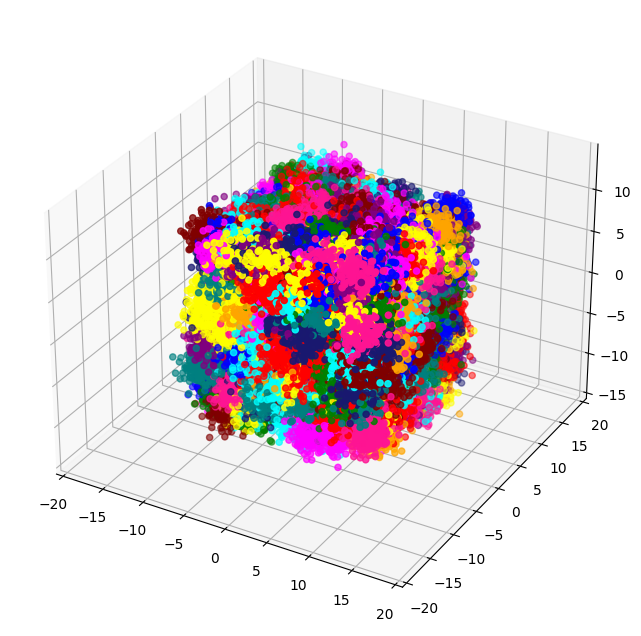

In [301]:
test_data_size = 200000
cluster_count = 912
feature_count = 16

test_data = (sk_data.make_blobs(test_data_size, feature_count, centers=cluster_count))
plot_test_data = test_data[0].T

x = plot_test_data[0]
y = plot_test_data[1]
z = plot_test_data[2]
label = test_data[1]
color_map = ['red','yellow','green','cyan','blue','magenta','purple','teal','orange','maroon','deeppink','midnightblue']

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.scatter(x, y, z, c=label, cmap=colors.ListedColormap(color_map))

plt.show()

In [302]:
int_labels = test_data[1]
one_hot_labels = np.zeros((len(int_labels), cluster_count))
one_hot_labels[np.arange(len(int_labels)), int_labels] = 1

In [303]:
nn_input = np.zeros(test_data_size,object)   
for data_point in range(test_data_size):
    nn_input[data_point] = [test_data[0][data_point],one_hot_labels[data_point]]

In [304]:
train_ratio = 0.8
input_split_index = int(len(nn_input) * train_ratio)
nn_train_input = nn_input[:input_split_index]
nn_test_input = nn_input[input_split_index:]

In [305]:
nn_size = [feature_count,32,32,cluster_count]
init_wb = Neural.generate_weights_and_biases(nn_size)

nn = Neural.NeuralNetwork(nn_size, init_wb, 3)

In [306]:
times = []
for x in range(3):
    start_time = time.time()
    nn_train = nn.train_nn(nn_train_input,nn_test_input,500, 1, 0.1)
    times.append(time.time() - start_time)

print(times)
    

Epoch 1 complete
Epoch 1 complete
Epoch 1 complete
[90.84014654159546, 91.51970791816711, 91.31704449653625]


[11.434851884841919, 11.563637018203735, 11.46991777420044, 11.159409761428833, 11.075731992721558, 11.087390899658203, 11.162274360656738, 11.207673072814941, 11.319588661193848, 11.370213985443115]
[10.888586282730103, 10.834753274917603, 11.018200397491455, 10.90951156616211, 10.841919660568237, 10.797135829925537, 10.769731760025024, 10.82339358329773, 10.822489023208618, 10.756078481674194]

[94.26130247116089, 93.15060305595398, 93.77045559883118]


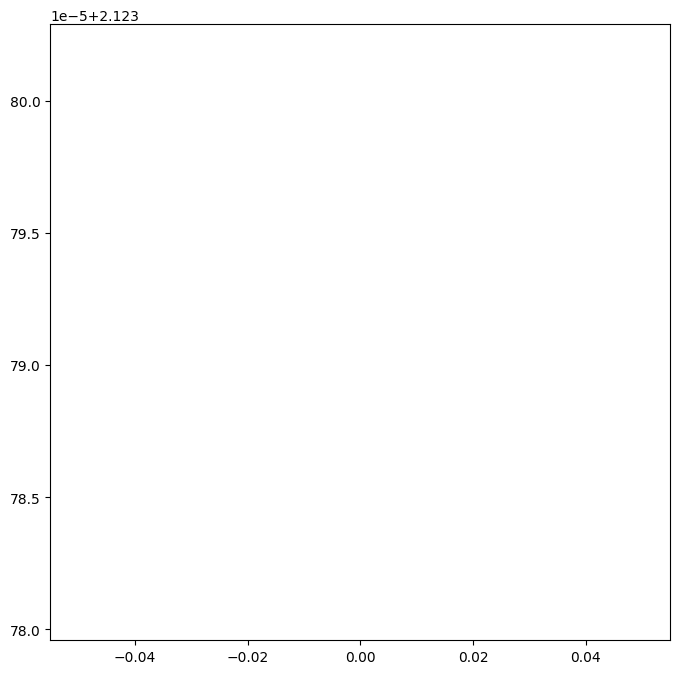

In [307]:
fig = plt.figure(figsize=(8,8))
plt.plot(nn_train[0], color='red')
plt.plot(nn_train[1], color='blue')
plt.show()